In [1]:
import pandas as pd
import numpy as np

In [2]:
GCS = pd.read_csv(r"..\util\data\structured\emotion\GC_services2019.csv")    # General services Summary 2019 #
GCS.drop(['Unnamed: 0'], axis=1,inplace=True)
GCS = GCS.drop(columns=['page_number'])
list1 = GCS["word"].values

In [3]:
import nltk
from nltk.probability import FreqDist
fdist = FreqDist(list1)
print(fdist)

<FreqDist with 704 samples and 5313 outcomes>


In [4]:
fdist.most_common(10)

[('Continue', 96),
 ('Medical', 88),
 ('Resources', 78),
 ('Management', 74),
 ('Public', 72),
 ('County', 71),
 ('Planning', 69),
 ('Grant', 68),
 ('Improve', 68),
 ('Youth', 66)]

In [5]:
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)

<Figure size 640x480 with 1 Axes>

In [6]:
GCS.sentiment = GCS.sentiment.replace({"Negative": "0","Positive": "1","Trust" :"2","Sadness":"0","Anticipation":"3","Surprise":"4","Fear":"5","Joy":"6","Anger":"7","Disgust":"8"})

In [7]:
GCS.sentiment.value_counts()

1    1767
2    1152
0     704
3     607
6     342
5     311
7     197
8     124
4     109
Name: sentiment, dtype: int64

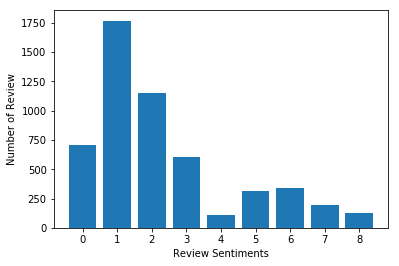

In [8]:
Sentiment_count=GCS.groupby('sentiment').count()
plt.bar(Sentiment_count.index.values, Sentiment_count['word'])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.show()

In [9]:
##########################################################################################################################

In [92]:
GCS08 = pd.read_csv(r"..\util\data\structured\emotion\GC_services2008.csv")    # General services Summary 2008 #
GCS08.drop(['Unnamed: 0'], axis=1,inplace=True)
GCS08 = GCS08.drop(columns=['page_number'])
list2 = GCS08["word"].values

In [93]:
import nltk
from nltk.probability import FreqDist
fdist = FreqDist(list2)
print(fdist)

<FreqDist with 497 samples and 2732 outcomes>


In [94]:
fdist.most_common(10)

[('Emergency', 40),
 ('Medical', 40),
 ('Director', 40),
 ('Public', 38),
 ('Planning', 36),
 ('Continue', 36),
 ('Management', 34),
 ('Provide', 34),
 ('County', 33),
 ('Resources', 33)]

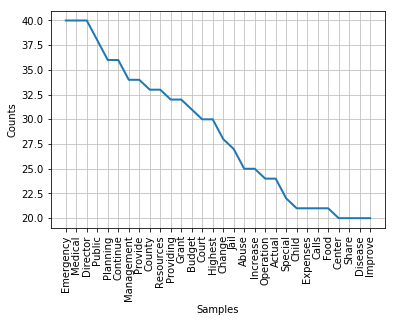

In [95]:
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)

In [96]:
GCS08.sentiment = GCS08.sentiment.replace({"Negative": "0","Positive": "1","Trust" :"2","Sadness":"0","Anticipation":"3","Surprise":"4","Fear":"5","Joy":"6","Anger":"7","Disgust":"8"})

In [97]:
GCS08.sentiment.value_counts()

1    859
2    573
0    382
3    335
5    200
6    174
7     85
8     65
4     59
Name: sentiment, dtype: int64

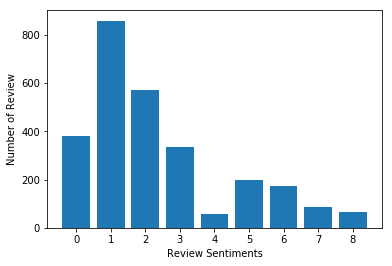

In [98]:
Sentiment_count=GCS08.groupby('sentiment').count()
plt.bar(Sentiment_count.index.values, Sentiment_count['word'])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.show()

In [99]:
GCF = pd.read_csv(r"..\util\data\structured\emotion\GC Funds.csv")    # General Fund Summary 2019 #
GCF.drop(['Unnamed: 0'], axis=1,inplace=True)
GCF1 = GCF.drop(columns=['page_number'])

In [100]:
list1 = GCF1["word"].values

In [101]:
from nltk.probability import FreqDist
fdist = FreqDist(list1)
print(fdist)

<FreqDist with 191 samples and 1266 outcomes>


In [102]:
fdist.most_common(10)

[('Emergency', 48),
 ('General', 40),
 ('Public', 36),
 ('Court', 36),
 ('Attorney', 36),
 ('Tax', 34),
 ('Planning', 33),
 ('Recreation', 30),
 ('Child', 30),
 ('Resources', 30)]

In [103]:
CC = pd.read_csv(r"..\util\data\structured\emotion\CharlotteCityFunds2019.csv")    
CC.drop(['Unnamed: 0'], axis=1,inplace=True)
CC = CC.drop(columns=['page_number'])
list1 = CC["word"].values

In [104]:
import nltk
from nltk.probability import FreqDist
fdist = FreqDist(list1)
print(fdist)

<FreqDist with 468 samples and 5303 outcomes>


In [105]:
fdist.most_common(10)

[('Retirement', 210),
 ('Provide', 138),
 ('Pay', 120),
 ('Public', 118),
 ('Salary', 116),
 ('General', 110),
 ('Planning', 93),
 ('Change', 81),
 ('Risk', 78),
 ('Efficient', 78)]

In [106]:
CC08 = pd.read_csv(r"..\util\data\structured\emotion\CharlotteCityFunds2008.csv")    
CC08.drop(['Unnamed: 0'], axis=1,inplace=True)
CC08 = CC08.drop(columns=['page_number'])
list2 = CC08["word"].values

In [107]:
import nltk
from nltk.probability import FreqDist
fdist8 = FreqDist(list2)
print(fdist8)

<FreqDist with 207 samples and 918 outcomes>


In [108]:
fdist8.most_common(10)

[('Planning', 24),
 ('Youth', 24),
 ('General', 22),
 ('Center', 22),
 ('Retirement', 21),
 ('Grant', 20),
 ('Management', 20),
 ('Tax', 18),
 ('Debt', 16),
 ('Attorney', 16)]

In [109]:
CC08.head()

,word,sent_count,sentiment,category
0,Tax,19,Negative,Sentiment
1,Tax,19,Sadness,Emotion
2,Grant,17,Anticipation,Emotion
3,Grant,17,Joy,Emotion
4,Grant,17,Positive,Sentiment


In [110]:
CC08.sentiment = CC08.sentiment.replace({"Negative": "0","Positive": "1","Trust" :"2","Sadness":"0","Anticipation":"3","Surprise":"4","Fear":"5","Joy":"6","Anger":"7","Disgust":"8"})

In [111]:
CC08.head()

,word,sent_count,sentiment,category
0,Tax,19,0,Sentiment
1,Tax,19,0,Emotion
2,Grant,17,3,Emotion
3,Grant,17,6,Emotion
4,Grant,17,1,Sentiment


In [112]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [113]:
CC08 = CC08.groupby(['sentiment'])[["sent_count"]].sum()

In [114]:
CC08.reset_index()

,sentiment,sent_count
0,0,359
1,1,514
2,2,460
3,3,161
4,4,48
5,5,139
6,6,83
7,7,67
8,8,30


In [115]:
GCS08.sentiment =GCS08.sentiment.replace({"Negative": "0","Positive": "1","Trust" :"2","Sadness":"0","Anticipation":"3","Surprise":"4","Fear":"5","Joy":"6","Anger":"7","Disgust":"8"})

In [116]:
GCS08 = GCS08.groupby(['sentiment'])[["sent_count"]].sum()

In [117]:
GCS08.reset_index()

,sentiment,sent_count
0,0,645
1,1,1376
2,2,1068
3,3,597
4,4,99
5,5,377
6,6,261
7,7,153
8,8,130


In [120]:
GCS08 = GCS08.rename(columns={'sent_count': 'sent_count_b'})

In [122]:
GCS08.reset_index()

,sentiment,sent_count_b
0,0,645
1,1,1376
2,2,1068
3,3,597
4,4,99
5,5,377
6,6,261
7,7,153
8,8,130


In [125]:
test = pd.merge(GCS08,CC08, on='sentiment', how='outer')

In [127]:
test = test.reset_index()

In [128]:
test

,sentiment,sent_count_b,sent_count
0,0,645,359
1,1,1376,514
2,2,1068,460
3,3,597,161
4,4,99,48
5,5,377,139
6,6,261,83
7,7,153,67
8,8,130,30


Text(0, 0.5, 'sent_count')

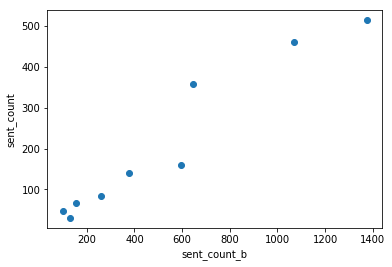

In [129]:
plt.scatter(test.sent_count_b,test['sent_count'])
plt.xlabel('sent_count_b')
plt.ylabel('sent_count')

In [1]:
!pip install tika==1.19

  Found existing installation: tika 1.22
    Uninstalling tika-1.22:
      Successfully uninstalled tika-1.22


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [195]:
from tika import parser
import pandas as pd
import numpy as np

raw = parser.from_file('GC Funds 2008.pdf')
print(raw['content'])














































General Fund Revenues Proposed General Fund revenues and appropriated fund balance for FY 2008-09 

total $586,115,142. This is 6.7% ($36.85 million) higher than the budget approved for FY 2007-08. 

Property Tax revenues will account for 54% of the total revenue budget next fiscal year. The next largest 

sources of funds for general county operations are Federal and State Funds (17%) and Sales Tax 

revenues (13%). The FY 2008-09 adopted budget includes a general county wide tax rate of $0.7374 for 

each $100 of assessed property valuation. This is an increase of 4.6 cents over the tax rate during FY 

2008-09. Property Tax revenues, including payments and penalties for taxes due in prior years, will 

increase $29.2 million in FY 2008-09. In addition, the County expects an increase in Federal and State 

funds (+$11.9 million) and revenues derived from User Charges/Fees (+$4.6 million). Recent state 

legislation tied to Medicaid relief 

In [196]:
test = list(raw.values())

In [197]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [198]:
import re as re

In [200]:
type(makeitastring)

str

In [201]:
test1 = re.split('(?<!\d)[.]|[.](?!\d)',makeitastring )

In [202]:
type(test1)

list

In [203]:
df = pd.DataFrame({'col':test1})

In [204]:
df.head()

,col
0,200\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...
1,This is 6.7% ($36.85 million) higher than the...
2,\n\nProperty Tax revenues will account for 54...
3,The next largest \n\nsources of funds for gen...
4,The FY 2008-09 adopted budget includes a gene...


In [205]:
df['col'] = df['col'].str.replace("[^a-zA-Z#]", " ")

In [206]:
df['col']

0                                                    ...
1       This is              million  higher than the...
2         Property Tax revenues will account for     ...
3       The next largest   sources of funds for gener...
4       The FY         adopted budget includes a gene...
5       This is an increase of     cents over the tax...
6       Property Tax revenues  including payments and...
7       In addition  the County expects an increase i...
8       Recent state   legislation tied to Medicaid r...
9       As a result  sales tax revenues are expected ...
10      Additional details regarding the county s rev...
11      FY           Proposed Revenues Change from Pr...
12      Millions    Total Assessed Property Values Al...
13      Property tax revenues are based on the assess...
14      For FY              the ad valorem property t...
15                                 Current year taxes  i
16                                                     e
17       taxes paid on time  wi

In [207]:
df = df[:248]

In [208]:
df.head()

,col
0,...
1,This is million higher than the...
2,Property Tax revenues will account for ...
3,The next largest sources of funds for gener...
4,The FY adopted budget includes a gene...


In [209]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt 

In [210]:
df['col'] = np.vectorize(remove_pattern)(df['col'], "@[\w]*")

In [211]:
df.head()

,col
0,...
1,This is million higher than the...
2,Property Tax revenues will account for ...
3,The next largest sources of funds for gener...
4,The FY adopted budget includes a gene...


In [223]:
df1['col'] = df1['col'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [224]:
df2 = df1[df1['col'].map(lambda d: len(d)) > 0]

In [225]:
!pip install afinn

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [226]:
from afinn import Afinn

In [227]:
afinn = Afinn(language='en')

In [228]:
df['afinn_score'] = df['col'].apply(afinn.score)

In [229]:
df.head()

,col,afinn_score,emotion
0,...,0.0,neg
1,This is million higher than the...,2.0,pos
2,Property Tax revenues will account for ...,0.0,neg
3,The next largest sources of funds for gener...,0.0,neg
4,The FY adopted budget includes a gene...,0.0,neg


In [238]:
df['emotion'][df['afinn_score'] < 0] = 'Negetive'
df['emotion'][df['afinn_score'] > 0] = 'positive'
df['emotion'][df['afinn_score'] == 0] = 'nuteral'

C:\Users\akash\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\akash\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\akash\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [240]:
df.head()

,col,afinn_score,emotion
0,...,0.0,nuteral
1,This is million higher than the...,2.0,positive
2,Property Tax revenues will account for ...,0.0,nuteral
3,The next largest sources of funds for gener...,0.0,nuteral
4,The FY adopted budget includes a gene...,0.0,nuteral


In [232]:
# df['col'] = df['col'].str.replace("[^a-zA-Z#]", " ")

In [78]:
#df['col'] = df['col'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

C:\Users\akash\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [93]:
#df['col'] = df['col'].apply(lambda x: x.split())


C:\Users\akash\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
